In [81]:
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [82]:
data_pt = np.genfromtxt("data.csv", delimiter=",")

In [83]:
input_val = [] 
output_val = []
for i in range(len(data_pt)):
    input_val.append(data_pt[i,0])
    output_val.append(data_pt[i,1])

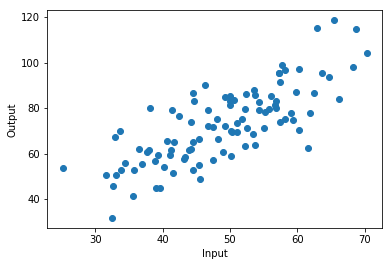

In [84]:
plt.scatter(input_val, output_val)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

In [85]:
#initial MSE
def mse_calc(slope, intercept, d_pt):
    tot_error = 0
    pred = []
    for i in range(len(d_pt)):
        x = d_pt[i,0]
        y = d_pt[i,1]
        #calculating total error. It follows the formula y=mx+c
        #m is the slope and c is the intercept
        pred.append(((slope*x) + intercept))
        tot_error += (y - ((slope*x) + intercept)) ** 2
    error = tot_error / float(len(d_pt))
    return error, pred

In [159]:
#gradient descent 
def grad_descent(s_slope, s_intercept, l_rate, iter_val, d_pt):
    
    for i in range(iter_val):
        int_slope = 0
        int_intercept = 0
        n_pt = float(len(d_pt))
        
        
        for i in range(len(d_pt)):
            x = d_pt[i,0]
            y = d_pt[i,1]
            int_intercept += - (2/n_pt) * (y - ((s_slope * x) + s_intercept))
            int_slope += - (2/n_pt) * x * (y - ((s_slope * x) + s_intercept))
            
        final_slope = s_slope - (l_rate * int_slope)
        final_intercept = s_intercept - (l_rate * int_intercept)
        s_slope = final_slope
        s_intercept = final_intercept
        
        
    return  s_slope, s_intercept

initial error 5565.10783448


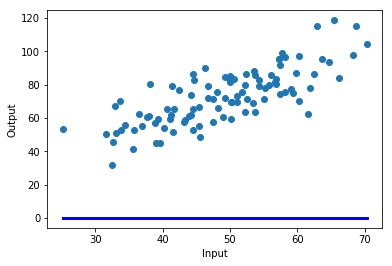

In [163]:
#defining slope and intercept value as 0 
learning_rate = 0.0001
start_slope = 0
start_intercept = 0
iteration = 950
#intial run
e_value, prediction = mse_calc(start_slope, start_intercept, data_pt)
print('initial error', e_value)
#Graph
plt.scatter(input_val, output_val)
plt.plot(input_val, prediction, color='blue', linewidth = 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

In [164]:
#gradient descent
grad_slope, grad_intercept = grad_descent(start_slope, start_intercept, learning_rate, iteration, data_pt)
#final_value
final_e_value, prediction = mse_calc(grad_slope, grad_intercept, data_pt)

In [165]:
print('slope', grad_slope)
print('intercept', grad_intercept)
print('final_error', final_e_value)

slope 1.48571145984
intercept 0.0591245942866
final_error 112.768439393


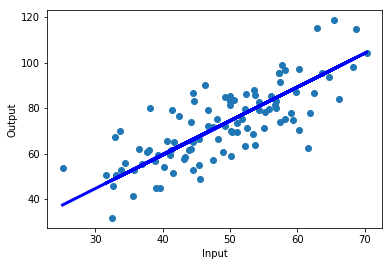

In [166]:
plt.scatter(input_val, output_val)
plt.plot(input_val, prediction, color='blue', linewidth = 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()